# Data Discretization and Data Normalization. Use any suitable dataset (e.g. heart dataset https://www.kaggle.com/zhaoyingzhu/heartesv ). 
# Perform following operations on given dataset suitable programming language. 
# a) Find standard deviation, variance of every numerical attribute. 
# b) Find covariance and perform Correlation analysis using Correlation coefficient. 
# c) How many independent features are present in the given dataset? 
# d) Can we identify unwanted features? 
# e) Perform the data discretization using equi frequency binning method on age attribute 
# f) Normalize RestBP, chol, and MaxHR attributes (considering above dataset) using min-max normalization, Z-score normalization, and decimal scaling normalization.


In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("df_batting.csv")
df

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823
...,...,...,...,...,...,...,...,...,...,...,...
694,Pakistan Vs England,England,3,Phil Salt,10,9,2,0,111.11,out,T20I # 1879
695,Pakistan Vs England,England,4,Ben Stokes,52,49,5,1,106.12,not_out,T20I # 1879
696,Pakistan Vs England,England,5,Harry Brook,20,23,1,0,86.95,out,T20I # 1879
697,Pakistan Vs England,England,6,Moeen Ali,19,13,3,0,146.15,out,T20I # 1879


In [5]:
# a) Find standard deviation, variance of every numerical attribute

tot=0
cnt=0
for i in df['runs']:
    tot=tot+i
    cnt=cnt+1
mean_runs=tot/cnt
print("Mean of Runs : ",mean_runs)

# Calculating Variance
sum=0
for i in df['runs']:
    sum=sum+((i-mean_runs)**2)
variance_of_runs=(1/cnt)*sum
print("Variance of Runs : ", variance_of_runs)

# Calculating Standard Deviation
import math
print("Standard Deviation : ",math.sqrt(variance_of_runs))




Mean of Runs :  15.978540772532188
Variance of Runs :  349.5431732640749
Standard Deviation :  18.696073739266083


In [7]:
# b) Find covariance and perform Correlation analysis using Correlation coefficient.

def covariance(fours, sixes):
    tot_fours=0
    n=0
    for i in fours:
        tot_fours=tot_fours+i
        n=n+1
    tot_sixes=0
    for i in sixes:
        tot_sixes=tot_sixes+i
    mean_4s=tot_fours/n
    mean_6s=tot_sixes/n
    x=0
    for i in range(n):
        x=x+((fours[i]-mean_4s)*(sixes[i]-mean_6s))
    return x/(n)
cov=covariance(df['4s'], df['6s'])
print("Covariance : ", cov)


Covariance :  0.8806265234823496


In [10]:
std_4s=np.std(df['4s'])
std_6s=np.std(df['6s'])
print("Std dev of 4s : ",std_4s)
print("Std dev of 6s : ",std_6s)

corelation_coeff=covariance(df['4s'], df['6s'])/(std_4s*std_6s)
print("Correlation Coefficient : ",corelation_coeff)

Std dev of 4s :  1.8331355874280097
Std dev of 6s :  0.9777645023082866
Correlation Coefficient :  0.4913182620867037


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('df_bowling.csv')
df.head(10)

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0,T20I # 1823
5,Namibia Vs Sri Lanka,Namibia,Gerhard Erasmus,1.0,0,8,0,8.00,1,1,0,0,0,T20I # 1823
6,Namibia Vs Sri Lanka,Namibia,David Wiese,4.0,0,16,2,4.00,13,1,0,0,0,T20I # 1823
7,Namibia Vs Sri Lanka,Namibia,Bernard Scholtz,4.0,0,18,2,4.50,10,1,0,0,0,T20I # 1823
8,Namibia Vs Sri Lanka,Namibia,Ben Shikongo,3.0,1,22,2,7.33,6,3,0,0,0,T20I # 1823
9,Namibia Vs Sri Lanka,Namibia,JJ Smit,3.0,0,16,1,5.33,7,0,0,1,0,T20I # 1823


count    500.000000
mean      23.170000
std       10.149637
min        2.000000
25%       16.000000
50%       23.000000
75%       30.000000
max       59.000000
Name: runs, dtype: float64

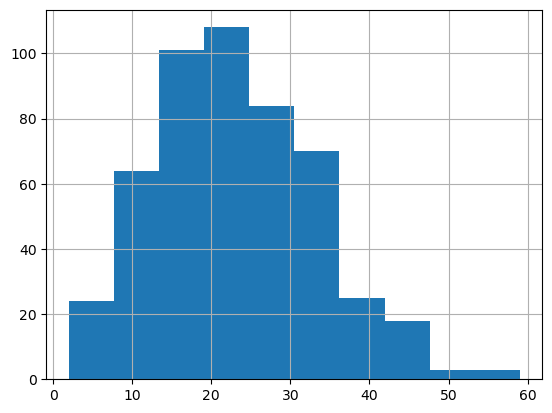

In [18]:
# Data Descretization
df['runs'].hist()
df['runs'].describe()


In [56]:
df['runs_cat']=pd.cut(x=df['runs'], bins=[0, 12, 24, 36, 48, 60], labels=['min', 'Below Avg', 'Avg', 'Above Avg', 'max'])

In [58]:
df.head(5)

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id,runs_cat
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0,T20I # 1823,Below Avg
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0,T20I # 1823,Above Avg
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0,T20I # 1823,Above Avg
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0,T20I # 1823,Avg
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0,T20I # 1823,Avg


In [60]:
import matplotlib.pyplot as plt
def draw_barplot(x):
    s=x.value_counts()
    plt.bar(s.index, s.values)

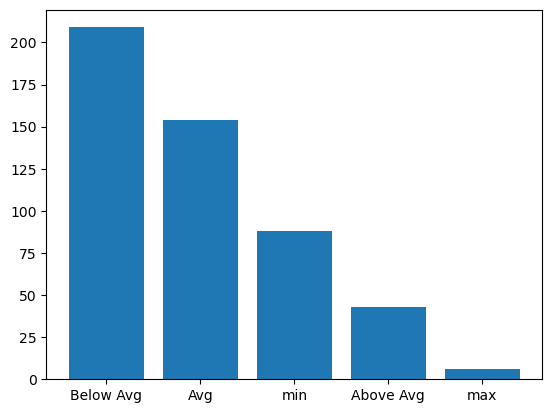

In [54]:
draw_barplot(df['runs_cat'])

In [63]:
#  Normalization

# 1. Min Max Normalization

df.describe()

,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.154000,0.03400,23.170000,1.030000,7.593920,7.644000,1.818000,0.662000,0.618000,0.092000
std,1.038615,0.19214,10.149637,1.023325,2.900713,4.215306,1.509116,0.872513,0.890878,0.340246
min,0.500000,0.00000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.275000,0.00000,16.000000,0.000000,5.500000,4.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,0.00000,23.000000,1.000000,7.250000,8.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,0.00000,30.000000,2.000000,9.000000,11.000000,3.000000,1.000000,1.000000,0.000000
max,4.000000,2.00000,59.000000,5.000000,23.000000,18.000000,8.000000,5.000000,6.000000,3.000000


In [79]:
def min_max_normal(x):
    mn_x=min(x)
    mx_x=max(x)
    for i in x.head(10):
        res=(i-mn_x)/(mx_x-mn_x)
        print(f"min max Normalization of {i} = {res}")
min_max_normal(df['runs'])

min max Normalization of 23 = 0.3684210526315789
min max Normalization of 39 = 0.6491228070175439
min max Normalization of 37 = 0.6140350877192983
min max Normalization of 36 = 0.5964912280701754
min max Normalization of 27 = 0.43859649122807015
min max Normalization of 8 = 0.10526315789473684
min max Normalization of 16 = 0.24561403508771928
min max Normalization of 18 = 0.2807017543859649
min max Normalization of 22 = 0.3508771929824561
min max Normalization of 16 = 0.24561403508771928


In [87]:
# 2. Z-Score Normalization

def z_score_normal(x):
    mean_x=x.mean()
    std_x=x.std()
    for i in x.head(10):
        res=(i-mean_x)/std_x
        print(f"Z-Score Normalization of {i} = {res}")
z_score_normal(df['runs'])

Z-Score Normalization of 23 = -0.016749367568652876
Z-Score Normalization of 39 = 1.559661697716308
Z-Score Normalization of 37 = 1.3626103145556878
Z-Score Normalization of 36 = 1.2640846229753777
Z-Score Normalization of 27 = 0.37735339875258733
Z-Score Normalization of 8 = -1.4946347412733036
Z-Score Normalization of 16 = -0.7064292086308233
Z-Score Normalization of 18 = -0.5093778254702032
Z-Score Normalization of 22 = -0.11527505914896292
Z-Score Normalization of 16 = -0.7064292086308233


In [98]:
# 3. Decimal Scaling Normalization

def decimal_scaling_normal(x):
    mx_abs_value=x.abs().max()
    j=len(str(int(mx_abs_value)))
    for i in x.head(10):
        res=(i)/(10**j)
        print(f"Decimal Scaling Normalization of {i} = {res}")
decimal_scaling_normal(df['runs'])

Decimal Scaling Normalization of 23 = 0.23
Decimal Scaling Normalization of 39 = 0.39
Decimal Scaling Normalization of 37 = 0.37
Decimal Scaling Normalization of 36 = 0.36
Decimal Scaling Normalization of 27 = 0.27
Decimal Scaling Normalization of 8 = 0.08
Decimal Scaling Normalization of 16 = 0.16
Decimal Scaling Normalization of 18 = 0.18
Decimal Scaling Normalization of 22 = 0.22
Decimal Scaling Normalization of 16 = 0.16
